# Uber Data Analysis

# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use('ggplot')

# ACCESSING THE DATASET

In [5]:
df=pd.read_csv(r'C:\Users\tejith\Downloads\archive\UberDataset.csv')

In [6]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# INSPECTING THE DATASET

In [7]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
df.shape

(1156, 7)

In [10]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [11]:
type(df.iloc[0,0])

str

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [14]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [15]:
duplicate = df.duplicated()
duplicate.sum()

1

In [16]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# missing values

In [17]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [18]:
null_data =df[df['PURPOSE'].isnull()]
null_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,02-09-2016 10:54,02-09-2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,02-09-2016 11:43,02-09-2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,02-09-2016 13:36,02-09-2016 13:52,Personal,Tanglewood,Preston,5.1,NaN
...,...,...,...,...,...,...,...
1066,12/19/2016 14:37,12/19/2016 14:50,Business,Unknown Location,Unknown Location,5.4,NaN
1069,12/19/2016 19:05,12/19/2016 19:17,Business,Islamabad,Unknown Location,2.2,NaN
1071,12/20/2016 8:49,12/20/2016 9:24,Business,Unknown Location,Rawalpindi,12.0,NaN
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,NaN


In [19]:
df['PURPOSE'].fillna("Not Mentioned",inplace=True)

In [20]:
null_data =df[df['PURPOSE'].isnull()]
null_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE


In [21]:
print(df[df['END_DATE'].isnull()])
print()
print(df[df['CATEGORY'].isnull()])
print()
print(df[df['START'].isnull()])
print()
print(df[df['STOP'].isnull()])

     START_DATE END_DATE CATEGORY START STOP    MILES        PURPOSE
1155     Totals      NaN      NaN   NaN  NaN  12204.7  Not Mentioned

     START_DATE END_DATE CATEGORY START STOP    MILES        PURPOSE
1155     Totals      NaN      NaN   NaN  NaN  12204.7  Not Mentioned

     START_DATE END_DATE CATEGORY START STOP    MILES        PURPOSE
1155     Totals      NaN      NaN   NaN  NaN  12204.7  Not Mentioned

     START_DATE END_DATE CATEGORY START STOP    MILES        PURPOSE
1155     Totals      NaN      NaN   NaN  NaN  12204.7  Not Mentioned


In [23]:
df.drop(index=1155,inplace =True)

In [24]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [25]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [27]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [28]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [29]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [30]:
df["START_TIME"]=df['START_DATE'].dt.strftime('%H:%M')
df["END_TIME"]=df['END_DATE'].dt.strftime('%H:%M')
df.head()
df['DURATION']=df['END_DATE']-df['START_DATE']
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,START_TIME,END_TIME,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11,21:17,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mentioned,01:25,01:37,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25,20:38,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31,17:45,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42,15:49,0 days 01:07:00


In [31]:
df.PURPOSE.unique()

array(['Meal/Entertain', 'Not Mentioned', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [32]:
df.CATEGORY.unique()

array(['Business', 'Personal'], dtype=object)

In [33]:
average_distance= df.groupby('PURPOSE')['MILES'].mean()
average_distance

PURPOSE
Airport/Travel       5.500000
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      20.688119
Errand/Supplies      3.968750
Meal/Entertain       5.698125
Meeting             15.276344
Moving               4.550000
Not Mentioned        9.748008
Temporary Site      10.474000
Name: MILES, dtype: float64

# PLOTTING THE DATA

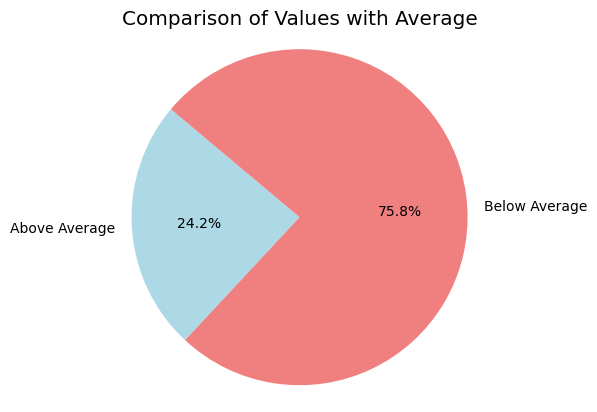

In [34]:
average_value = df['MILES'].mean()
above_average = df[df['MILES'] > average_value].shape[0]
below_average = df[df['MILES'] <= average_value].shape[0]
sizes = [above_average, below_average]
labels = ['Above Average', 'Below Average']
colors = ['lightblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Comparison of Values with Average')
plt.show()

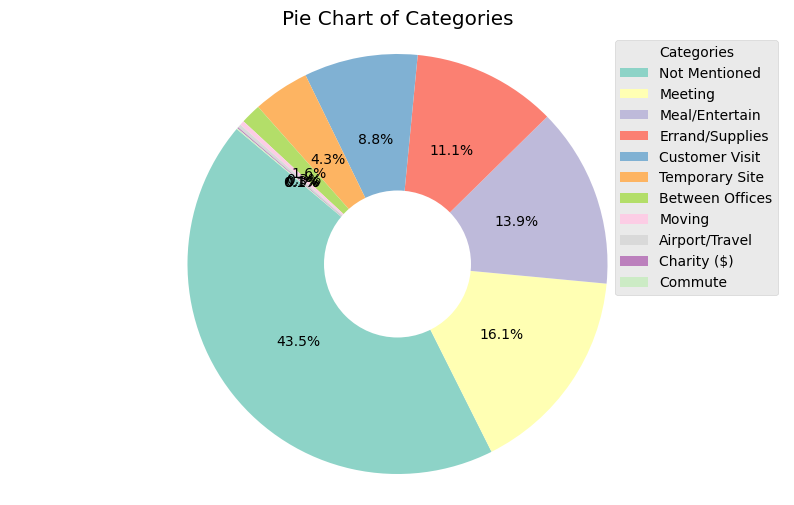

In [35]:
category_counts = df['PURPOSE'].value_counts()
sizes = category_counts.values
labels = category_counts.index
colors = plt.cm.Set3.colors
plt.figure(figsize=(10,6))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
centre_circle = plt.Circle((0,0),0.35,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels, title='Categories', loc='best')
plt.title('Pie Chart of Categories')
plt.show()

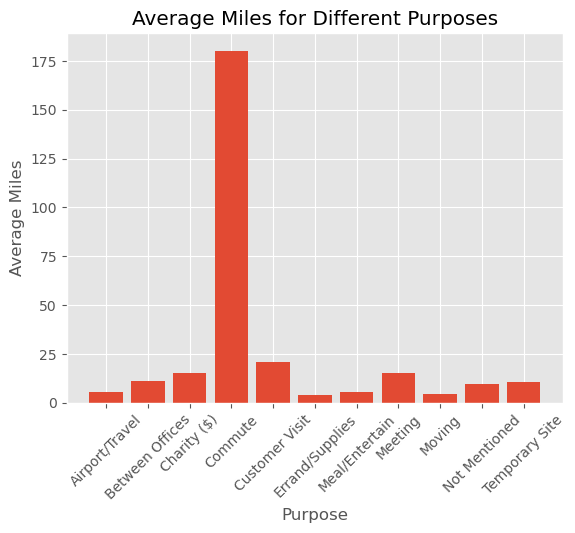

In [37]:
plt.bar(average_distance.index, average_distance.values)
plt.xlabel('Purpose')
plt.ylabel('Average Miles')
plt.title('Average Miles for Different Purposes')
plt.xticks(rotation=45)
plt.show()


In [38]:
p=df['PURPOSE'].value_counts()
p

Not Mentioned      502
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [39]:
c = df.PURPOSE.value_counts().reset_index().rename({'index':'PURPOSE','PURPOSE':'frequency'}, axis =1)
c

,PURPOSE,frequency
0,Not Mentioned,502
1,Meeting,186
2,Meal/Entertain,160
3,Errand/Supplies,128
4,Customer Visit,101
5,Temporary Site,50
6,Between Offices,18
7,Moving,4
8,Airport/Travel,3
9,Charity ($),1


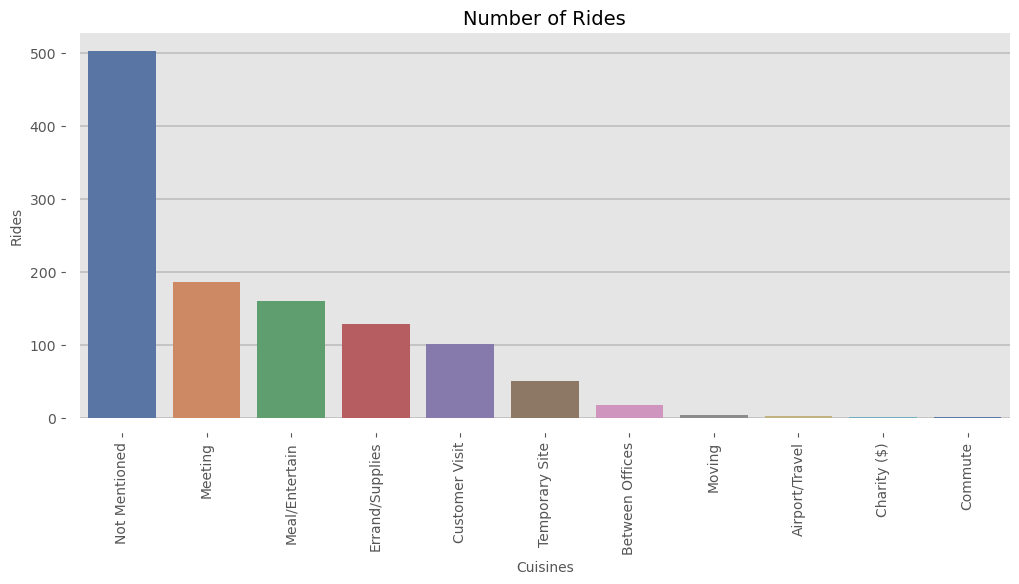

In [42]:
plt.figure(figsize=(12,5))                                       
sns.barplot(data = c.head(20),
           x='PURPOSE',
           y = 'frequency',
           palette= "deep", 
          )     
plt.grid(True, axis = 'y',                                                 
         color = 'black', 
         linestyle = '-',  
         linewidth=0.2
        ) 
plt.grid(False, axis = 'x')                                          
sns.despine(offset=10, trim=False)
plt.xticks(rotation = 90) 
plt.xlabel("Cuisines", fontsize = 10)                                          
plt.ylabel("Rides", fontsize = 10)                                  
plt.title('Number of Rides', fontsize = 14)                
plt.show()

In [44]:
df['ride_duration'] = df['END_DATE'] - df['START_DATE']
min_duration = df['ride_duration'].min()
max_duration = df['ride_duration'].max()
average_duration = df['ride_duration'].mean()
print("Minimum ride duration:", min_duration)
print("Maximum ride duration:", max_duration)
print("Average ride duration:", average_duration)

Minimum ride duration: 0 days 00:00:00
Maximum ride duration: 0 days 05:36:00
Average ride duration: 0 days 00:23:14.506065857


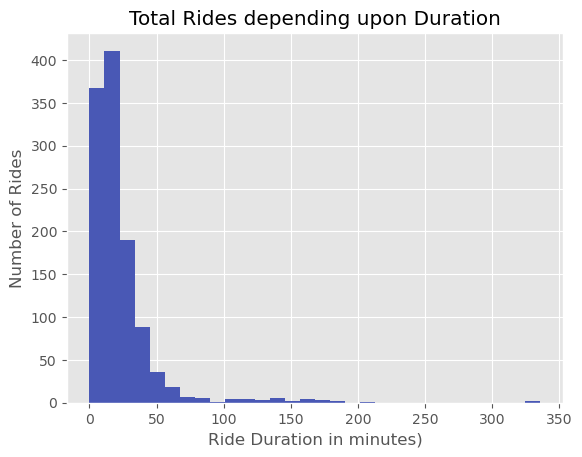

In [45]:
plt.hist(df['ride_duration'].dt.total_seconds() / 60, bins=30 , color= '#4958B5') 
plt.xlabel('Ride Duration in minutes)')
plt.ylabel('Number of Rides')
plt.title('Total Rides depending upon Duration')
plt.show()